# Introducrtion to Machine Learning: Assignment #2
## Submission date: 18\06\2024, 23:59.
### Topics:
- Perceptron
- Logistic Regression
- Gradient Descent
- SVM
- Kernels

Submitted by:

 Samih warwar 324888155

 Merry Shalabi 324007202

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Question 1 - Logistic regression - Part 1

In this section you will build a classifier on a "toy" problem - Based on two grades, we determine if student passes the course or not.

import libraries and load dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw2/exams.csv', header=None)
df.head(3)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0


Now, lets preproccess:
- Convert dataset to numpy, make sure classes are {0,1} or {-1,1} (depends of the update rule you choose)
- Split to train & test (80-20, starify, random_state=42)
- Scale using scaler of your choice

<font color='red'>When plotting the data we can see that there isnt a lot of outliners so we want to treat each feature equally by standardizing them to have a mean of zero and a standard deviation of one</font>

Unique classes in target before conversion: [0. 1.]
Unique classes in target after conversion: [0 1]


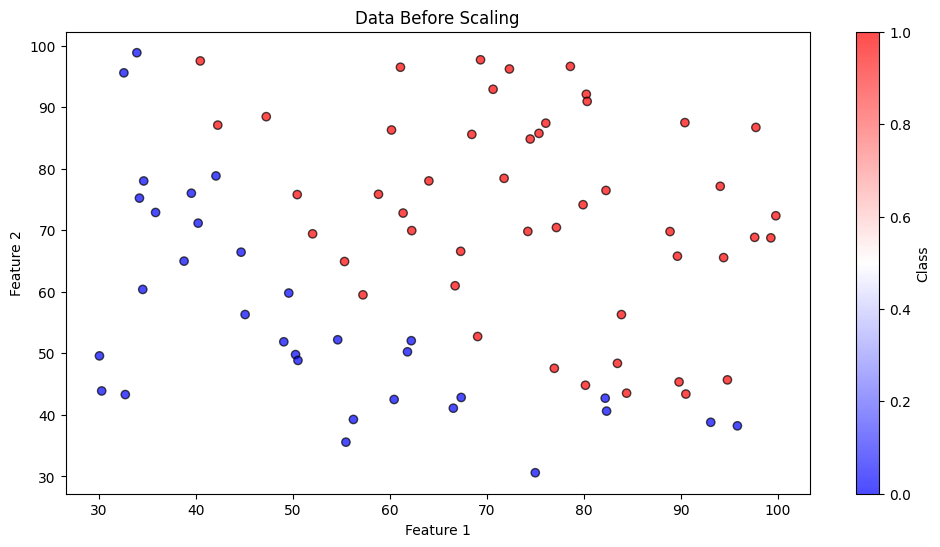

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split data into training and testing sets (80-20 split, stratified)
x = df.values[:, :-1]
y = df.values[:, -1]

print("Unique classes in target before conversion:", np.unique(y))
y = np.where(y == 0, 0, 1)

# Print unique values to confirm conversion
print("Unique classes in target after conversion:", np.unique(y))


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
# Plot the data before scaling
plt.figure(figsize=(12, 6))


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.7, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Before Scaling')
plt.colorbar(label='Class')
plt.show()


# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Implement the function Logistic_Regression_via_GD(P,y,lr):
-	Input: an np array ‘X’ of ‘n’ rows and ‘d’ columns, a label vector ‘y’ of ‘n’ entries and learning rate parameter ‘lr’.
-	Output: The function computes the output vector ‘w’ (and ‘b’) which minimzes the logistic regression cost function on ‘X’ and ‘y’. <br/>

The implementation should be fully yours. Don't use library implementation! <br/>
It should be done by implementing Gradient descent (with ‘lr’ as the learning rate) to solve logistic regression. <br/>

Tip: The gradients may be large, you can use $\frac{1}{n}\nabla{L}$ (which is the true empirical loss' gradient)



In [12]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def Logistic_Regression_via_GD(X, y, lr=0.01,threshold=0.0001,max_iterations=5000):
  samples_num, features_num = X.shape
  # initialize weights with ones
  w = np.ones(features_num)
  # initialize bias with zero
  b = 0
  prev_cost = float('inf')

  for i in range(max_iterations):
    z=np.dot(X,w) + b
    sigmoid_y= sigmoid(z)
    # compute cost
    cost = (-1/samples_num) * np.sum(y * np.log(sigmoid_y) + (1 - y) * np.log(1 - sigmoid_y))
    # check for convergence
    if(abs(prev_cost - cost) < threshold):
        break

    prev_cost=cost

    dw = (1/samples_num) * np.dot(X.T , (sigmoid_y - y))
    db = (1/samples_num) * np.sum((sigmoid_y - y))
    # update parameters
    w = w - lr*dw
    b = b - lr*db

  return w,b


The function 'predict' is already implemented for you. It gives a classification for a new sample (x) based on the sign of $w^\top x + b$. <br/>
You may change it if you chose to return {+1,0} instead of {+1,-1}.

In [13]:
def predict(x,b,w):
   # switched between x and w
    preds=np.sign(np.dot(x, w) + b)
    return (preds + 1) // 2


Call ‘Logistic_Regression_via_GD(X,y,lr)’, where ‘X’ and ‘y’ are the training data and the corresponding labels. <br/>
Run the model on the test data. With good LR you should get accuracy >= 88\%

In [14]:
chosen_lr =  0.1 # Add here.
w, b = Logistic_Regression_via_GD(X_train, y_train, chosen_lr)

preds = predict(X_test, b,w )
accuracy = np.sum(preds == y_test) / len(y_test)
print(f"Test accuracy is {accuracy * 100}%")

Test accuracy is 95.0%


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


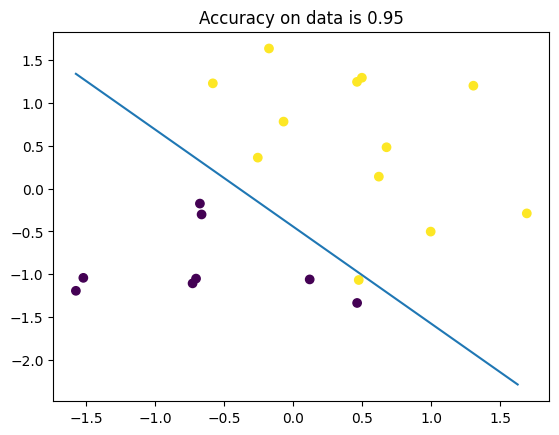

In [16]:
#@title Visualize data (on test)

import matplotlib.pyplot as plt

def plot(data, labels, w, bias):

    plt.scatter(data[:,0], data[:,1], c=labels)

    a, b, c = w[0], w[1], bias

    m = -a / b
    b = -c / b

    x = np.arange(np.min(data[:,0]), np.max(data[:,0]), 0.1)
    y = m * x + b

    plt.plot(x, y)
    preds = predict(data, bias,w )
    acc = np.count_nonzero(labels == preds) / len(labels)
    plt.title(f"Accuracy on data is {acc}")

    plt.show()

plot(X_test, y_test, w, b)

## Question 1 - Logistic regression - Part 2
Now we are going to work on a much realistic problem - based on IMDB review, classify whether its positive or negative review.

In [17]:
# import libraries
import pandas as pd
import gensim
from gensim.models import Word2Vec
import os

Print first review <br/>
Tip: Click on file -> mount drive. Since the dataset is heavy (60MB), you don't want to upload it over and over each time. Then, you will be able to open it from your drive storage.

In [18]:
df = pd.read_csv('/content/IMDB Dataset.csv')    # you may change the path according to your drive

print(f"The dataset shape is {df.shape}")
zip
# print the first line
print(df.iloc[0].review)
print(df.iloc[0].sentiment)

The dataset shape is (50000, 2)
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appe

As you can see, the input is a <b>sentence</b>. The proccess of turning words into <u>meaningful</u> continious vectors is called "tokenization" (you will learn more in DL and NLP). In the next section you will load the model and proccess the reviews to obtain continious representation for the data

In [19]:
#@title Model loader function

MODEL_PATH = 'wordvec.model'

def load_model(data):
	if os.path.exists(MODEL_PATH):
		return gensim.models.Word2Vec.load(MODEL_PATH)
	else:
		model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1)
		model.save(MODEL_PATH)
		return model

In [20]:
sentences = df['review'].tolist()

# turn sentences into a list. Each sentence is an array of words
tokenized_sentences = [[token for token in row.split()] for row in sentences]

# will ~3 minutes. The model is saved to a LOCAL path.
model = load_model(tokenized_sentences)     # calls to "model loader function" above.

In [21]:
word_vectors = model.wv
print(word_vectors['wow'].shape)
print(word_vectors['wow'])

(100,)
[-0.01123411  0.06687951  0.33742255  0.24984373 -0.07751317 -0.26905647
  0.21295373  0.43522397 -0.6250534  -0.0505269   0.0352723  -0.31565878
  0.17581347  0.1604926   0.07541283 -0.10510455 -0.23054977 -0.15279947
 -0.12016147 -0.15895765  0.00666786  0.14391385 -0.03082609 -0.3790541
 -0.25299257  0.1688016  -0.10104495 -0.02789727  0.3565761   0.21966484
  0.16393575  0.16514945 -0.01952948 -0.37722325 -0.01838904  0.24209708
  0.13960697 -0.15573171 -0.13224389 -0.25045657 -0.12818973 -0.23039085
  0.30214682  0.2308023   0.16795981 -0.2812154  -0.20542057 -0.15628979
 -0.1541461   0.11685582  0.18336287 -0.09422708 -0.15342288 -0.15925388
  0.09505121 -0.03592732  0.01841531  0.3603033   0.01892084  0.02877092
 -0.14428431  0.018503   -0.05062788  0.2276033  -0.24226944 -0.03388426
  0.23377086  0.36112827 -0.43497965  0.32367727 -0.13720578  0.09828053
  0.09771331  0.00611957  0.32615796  0.16089892 -0.1928209   0.13189797
  0.00844004 -0.18429582  0.09507763  0.34422

As you can see, each word has now 100 features. <br/>
For simplicity, you will represent a sentence by the mean vector of all the words within it. <br/>
Your tasks are: <br/>
- Make sure classes are {0,1} or {-1,1} (depends of the update rule you choose). You can change that row.
- Construct X to be 50000 x 100, where each row represents a sentnce.
- Convert it to numpy.

In [22]:
y = df['sentiment'].replace({'positive': 1, 'negative': 0}).to_numpy()


def get_mean(word_vectors,sentence):
   words=sentence.split()
   sentence_word_vectors = [ word_vectors[word] for word in words if word in word_vectors]
   if len(sentence_word_vectors) == 0 :
       return np.zeros(100)
   return np.mean(sentence_word_vectors,axis=0)

X = np.array([get_mean(word_vectors,review) for review in df['review']])

print(X.shape)

X = np.array(X)
y = np.array(y)


(50000, 100)


Split the data into 20\% test and 80\% train. After that, split the train into smaller train and 20% validation. Use stratify and random state of 42\%

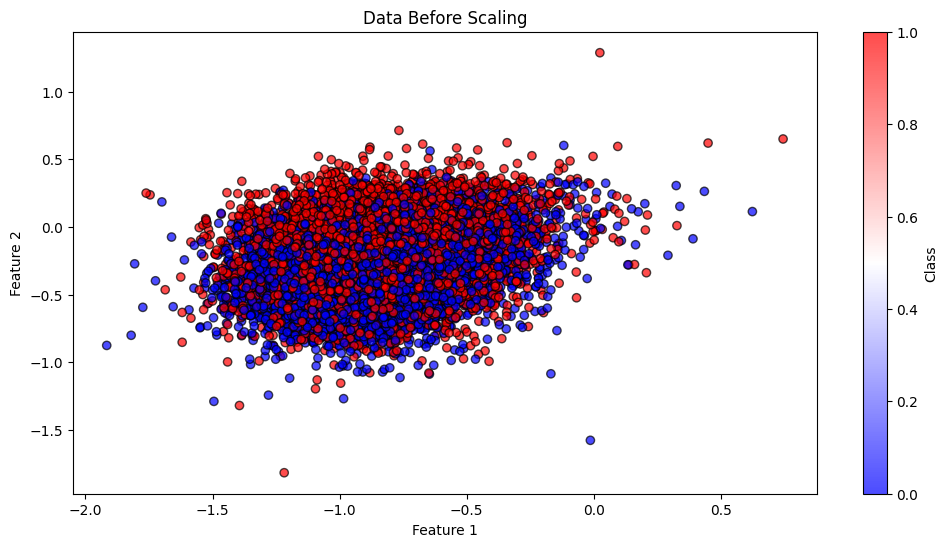

In [23]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Split the 90% train + validation into 80% train and 20% validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)
# Plot the data before scaling
plt.figure(figsize=(12, 6))


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.7, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Before Scaling')
plt.colorbar(label='Class')
plt.show()

Now, scale the data <br/>
Hint: there are many wrong ways to do that scaling (on train validation and test) but only one is correct. Recall What sets are required for validation and for evaluation on test. We discussed this on the second tutorial<br/>
What scaler did you choose and why?<br/>
<font color='red'>After plotting the data we saw that the data normally distributed within each feature so we want to treat each feature equally by standardizing them and to maintain and to ensure the same scale for each feature to preventing any feature from dominating the model training process, so choosing StandartScaler will give us the result we want</font>

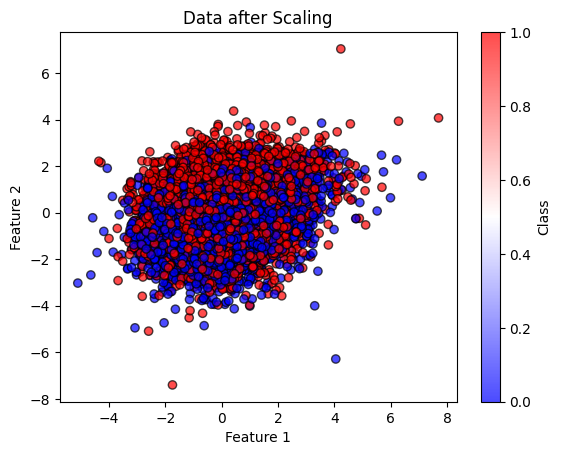

In [24]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_validation)
X_test = scaler.transform(X_test)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.7, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data after Scaling')
plt.colorbar(label='Class')
plt.show()


Copy here your logistic solver from before and adjust its implementation for this problem, if required.

In [25]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def Logistic_Regression_via_GD(X, y, lr=0.01,threshold=0.0001,max_iterations=5000):
  samples_num, features_num = X.shape
  # initialize weights with ones
  w = np.ones(features_num)
  # initialize bias with zero
  b = 0
  prev_cost = float('inf')

  for i in range(max_iterations):
    z=np.dot(X,w) + b
    sigmoid_y= sigmoid(z)
    # avoid log(0) by adjusting probability values
    epsilon = 1e-15
    sigmoid_y = np.clip(sigmoid_y, epsilon, 1 - epsilon)
    # compute cost
    cost = (-1/samples_num) * np.sum(y * np.log(sigmoid_y) + (1 - y) * np.log(1 - sigmoid_y))
    # check for convergence
    if(abs(prev_cost - cost) < threshold):
        break

    prev_cost=cost

    dw = (1/samples_num) * np.dot(X.T , (sigmoid_y - y))
    db = (1/samples_num) * np.sum((sigmoid_y - y))
    # update parameters
    w = w - lr*dw
    b = b - lr*db

  return w,b


Train model and evaluate on test set

In [26]:
chosen_lr = 1
w, b = Logistic_Regression_via_GD(X_train, y_train, chosen_lr)

preds = predict(X_test, b, w)
accuracy = np.sum(preds == y_test) / len(y_test)
print(f"Test accuracy is {accuracy * 100}%")

Test accuracy is 81.51%


Answer the following two questions: <br/>
- Try to justify the accuracy  you got. What should be done differently?
- How did you choose your lr? Is it the correct method?

<font color='red'>We could've get rid of non words characters and convert all big letters to small ones or the opposite to maintain the same treatment to both world that looks like 'X...' and 'x...'</font><br/>
<font color='red'>We tried low rl like 0.01 and then incresed it, and got the the lr that got us the best accuracy .This is not the best way to choose the lr, we could've build a graph or some kind of visualation using loops and then determine the best Lr</font><br/>

## Question 2 - Perceptron
You are given dataset for binary classification in 2D and aim to build the best Perceptron classifier.

import libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#@title load npy file

import requests
from io import BytesIO

def load_npy_file(url):
  response = requests.get(url)
  if response.status_code == 200:
    npy_data = np.load(BytesIO(response.content), allow_pickle=True).item()
    return npy_data
  else:
    return None

Load data and make sure labels are appropriate for the perceptron algorithm

Shape of X_train: (100, 2)
Shape of y_train: (100,)
Shape of X_test: (20, 2)
Shape of y_test: (20,)
First 5 samples from X_train:
[[-0.89532354  1.6186935 ]
 [ 1.14141412  1.4292499 ]
 [ 0.97386315  1.95842016]
 [-0.27941927  1.15404298]
 [ 0.04963098  1.19761793]]
First 5 labels from y_train:
[ 1 -1 -1  1  1]
First 5 samples from X_test:
[[ 0.90946405  4.90288582]
 [ 1.45396669  2.41597784]
 [-0.99303096  2.60633974]
 [ 0.88526235  1.45067211]
 [ 2.60012491  3.68248846]]
First 5 labels from y_test:
[-1 -1  1  1 -1]


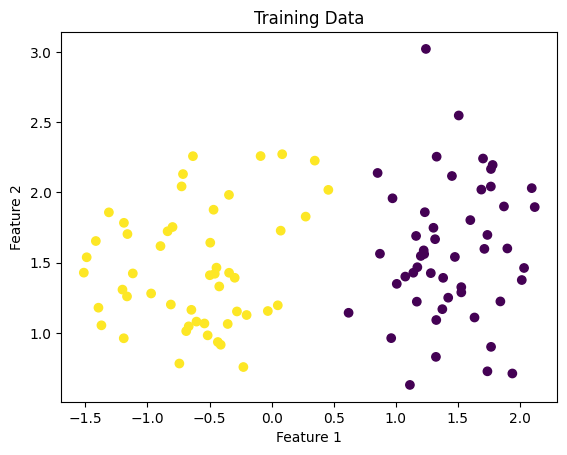

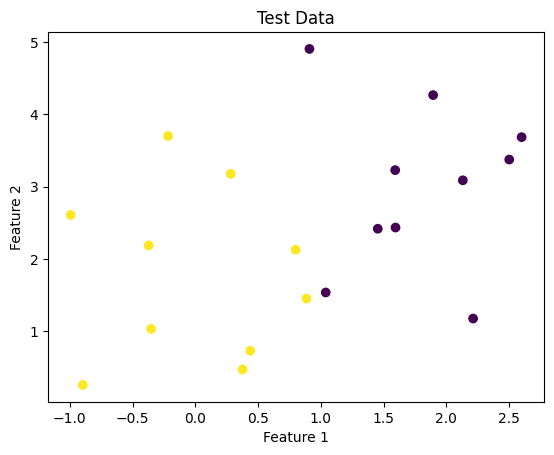

In [29]:

data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw2/perceptron_data.npy')

X_train = data_dict['X_train']
y_train = data_dict['y_train']
X_test = data_dict['X_test']
y_test = data_dict['y_test']
y_train = np.where(y_train == 0, -1, y_train)
y_test = np.where(y_test == 0, -1, y_test)


# Change labels here if required.
# Print the shapes of the datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Print the first few samples from the training set
print("First 5 samples from X_train:")
print(X_train[:5])
print("First 5 labels from y_train:")
print(y_train[:5])

# Print the first few samples from the test set
print("First 5 samples from X_test:")
print(X_test[:5])
print("First 5 labels from y_test:")
print(y_test[:5])

# Visualize the training data
def plot_data(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Plot the training data
plot_data(X_train, y_train, 'Training Data')

# Plot the test data
plot_data(X_test, y_test, 'Test Data')

Implement the function perceptron(data, labels, lr) which gets the train data along with labels and returns the weight vector learned by perceptron. Moreover, before the return, print the number of iterations it took to converge.



In [30]:

def perceptron(data, labels, lr,max_iterations=1000):
   samples_num, features_num = data.shape
   # add a column of ones to data for the bias term
   modified_data = np.c_[data,np.ones(samples_num)]
   # anitialize weights (including bias)
   a = np.ones(features_num + 1)
   iterations=0
   done_flag = False
   # iterate until all points are correctly classified or max iterations reached
   while not done_flag and iterations < max_iterations:
      done_flag=True
      for x,y in zip(modified_data,labels):
         y_pred = np.dot(a,x)
        # update weights if misclassification occurs
         if y*y_pred<=0 :
           a = a + lr*y*x
           done_flag= False

      iterations+=1

   print(f"number of iterations is {iterations} iterations")
   w=a[:-1]
   b=a[-1]

   return a



In [31]:
#@title Ploting function
def plot(data, labels, w, bias):

    plt.scatter(data[:,0], data[:,1], c=labels)

    a, b, c = w[0], w[1], bias

    m = -a / b
    b = -c / b

    x = np.arange(0.2, 0.8, 0.1)
    y = m * x + b

    plt.plot(x, y)

    preds = np.sign(np.dot(data, w)+bias)
    acc = np.count_nonzero(labels == preds) / len(labels)
    plt.title(f"Accuracy on data is {acc}")

    plt.show()

Choose LR, train and call the plotting function on the <u>train</u>
dataset. It prints the accurcay as the graph's title.
1. What is your conclusion about this data?
2. How would SVM react to such data?
3. What can you tell about the test accuracy?

<font color='red'>The data seems to be linearly separable to a significant extent, as the linear decision boundary effectively separates most of the yellow and purple points.</font></br>
<font color='red'>A linear SVM would likely perform well on this data since it is mostly linearly separable. The SVM would find the optimal hyperplane that maximizes the margin between the two classes.</font></br>
<font color='red'>We got accuracy of 0.9 that implies that the model porforms good not just on the training but also on unseen data,and it can tell that thr model is well tuned and appropriately complex for the given data, avoiding both underfitting and overfitting.</font></br>

number of iterations is 7 iterations


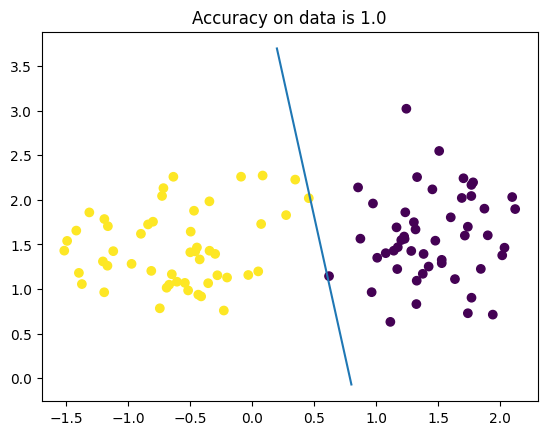

In [32]:
chosen_lr = 0.025 # Add here
w = perceptron(X_train, y_train, chosen_lr)
w, b = w[:-1], w[-1]
plot(X_train, y_train, w, b)

Print the test accuracy

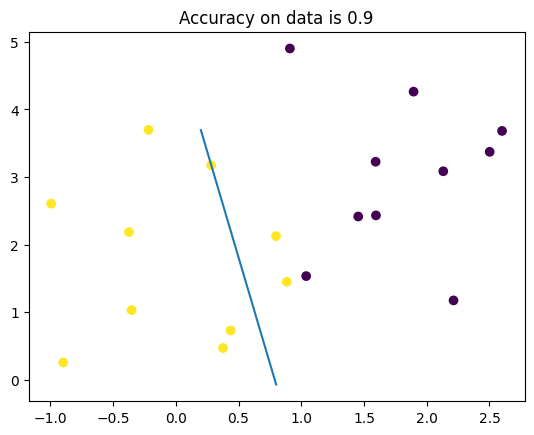

In [33]:
preds = np.sign(np.dot(X_test, w) + b)
acc = np.count_nonzero(y_test == preds) / len(y_test)

plot(X_test, y_test, w, b)

Time for some convergence theory! </br>

Let ${\{x_i\} }_{i=1}^n$ be the training set and $R$ such that $∀i:‖x_i ‖≤R$.<br/>
Now, let $γ$ such that $∀i:x_i\cdot g(x_i)>\gamma$.<br/>
Then, the number of iterations required for convergence is bounded (from above) by $R^2/\gamma^2$. However, this is true only when using single batch method.

Use this theorem to find the the value of upper bound for our problem and use that exact number as upper bound. Report the train accuracy.
Did the iterations number improve?<br/>
<font color='red'>Yes it did improve before we had 7 iterations now we got 4, and got approximately the same train accuracy.</font>


In [34]:

def perceptron_updated(data, labels, lr):
  # run initial perceptron to get initial weights
  a = perceptron(data,labels,lr)
  w=a[:-1]
  b=a[-1]
  # calculate R and gamma
  R = np.max(np.linalg.norm(data,axis=1))
  g = np.dot(data, w) + b
  gx_x = data * g[:, np.newaxis]
  gamma = np.min(np.sum(gx_x, axis=1))
  upper_bound = int(np.ceil(R**2/gamma**2))
  print(f"upper bound is : {upper_bound}")
  # rerun perceptron with optimized iteration limit
  a=perceptron(data,labels,lr,upper_bound)
  return a



number of iterations is 7 iterations
upper bound is : 4
number of iterations is 4 iterations


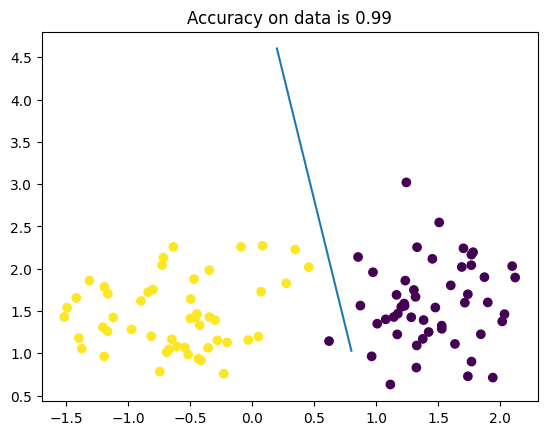

In [35]:

chosen_lr = 0.025
w = perceptron_updated(X_train, y_train, chosen_lr)
w, b = w[:-1], w[-1]
plot(X_train, y_train, w, b)

Report the test accuracy. Did it improve? What can you conclude about the perceptron algorithm in the linear separable case?<br>
<font color='red'>The test accuracy didnt improve we got the same accuracy even in most cases when using different lr we got lower accuracy than before ,so we can conclude that the perceptron algorithm will get us good results but not the best. </font><br>

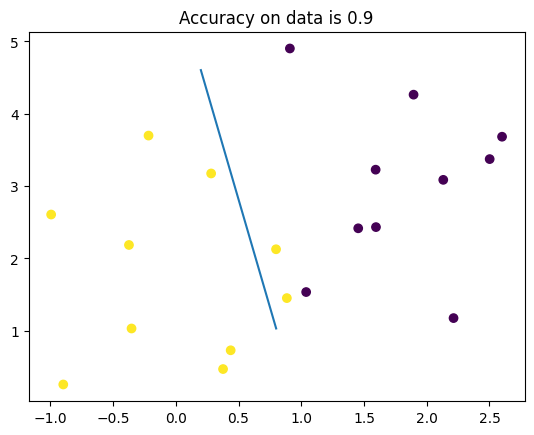

In [36]:
preds = np.sign(np.dot(X_test, w) + b)
acc = np.count_nonzero(y_test == preds) / len(y_test)
plot(X_test, y_test, w, b)

## Question 3 - SVM

You are given dataset for binary classification in 2D and aim to build the best SVM classifier.

import libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [47]:
#@title load npy file

import requests
from io import BytesIO

def load_npy_file(url):
  response = requests.get(url)
  if response.status_code == 200:
    npy_data = np.load(BytesIO(response.content), allow_pickle=True).item()
    return npy_data
  else:
    return None

load the data

In [48]:
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw2/svm_data_2d.npy')

# Access the data as needed
X_train = data_dict['X_train']
y_train = data_dict['y_train']
X_val = data_dict['X_val']
y_val = data_dict['y_val']

Look at the plot of the training data. <br/>
What _geometric_ shape could (almost) perfectly separate the data?<br/>

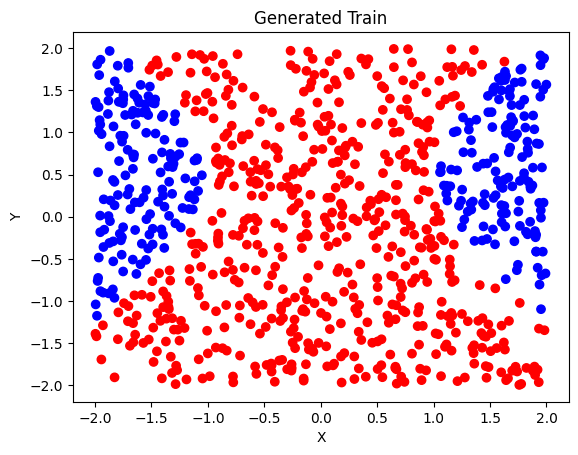

In [49]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Train')
plt.show()

Hope you answered parabola! <br/>
Its equation is:
$$Ax^2+By^2+Cx+Dy+e=0$$
Based on that equation, construct a mapping function into 4d space, such that the problem will become a linear ($w^t ϕ(x)+e=0$). <br/>
After the mapping, learn a linear classifier and print the hyperplane equation.<br/>
Note: after getting an output, I would recommend you to plot this equation on desmos, just to "see it".

In [50]:
def generate_features(X):
  x1 = X[:,0]
  x2 =  X[:,1]
  return np.c_[x1**2,x2**2,x1,x2]

new_features = generate_features(X_train)

model = SVC(kernel='linear', C=3,)
model.fit(new_features, y_train)

# Get the hyperplane equation coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_

# Print the hyperplane equation
equation_parts = []
for i in range(len(coefficients)):
    equation_parts.append(f"({coefficients[i]:.3f} * X{i+1})")
equation = " + ".join(equation_parts) + f" + ({intercept[0]:.3f})"

print("Hyperplane equation:")
print(f"  {equation}")

Hyperplane equation:
  (-5.180 * X1) + (5.054 * X2) + (0.045 * X3) + (-5.003 * X4) + (6.359)


Complete the missing lines to get plots on train and test

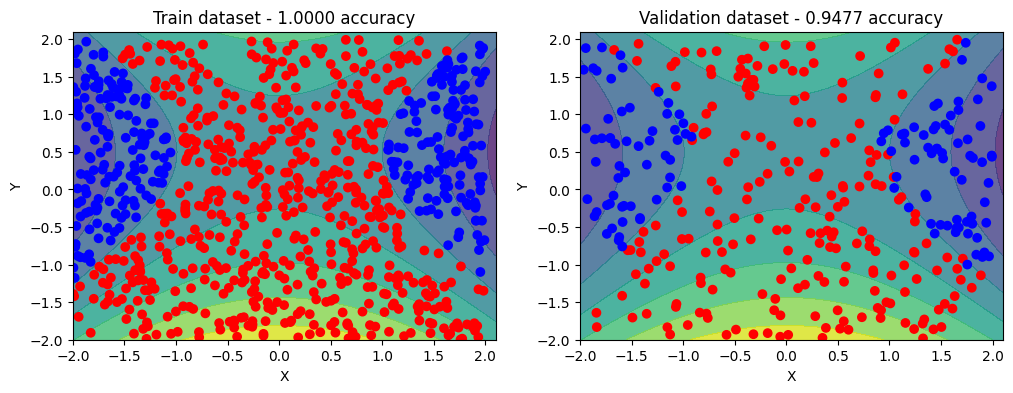

In [51]:


train_features = generate_features(X_train)
train_preds = model.predict(train_features)
train_acc = np.mean(train_preds == y_train)


val_features = generate_features(X_val)
val_preds = model.predict(val_features)
val_acc = np.mean(val_preds == y_val)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
data = np.c_[xx.ravel(), yy.ravel()]


new_features = generate_features(data)
Z = model.decision_function(new_features)
Z = Z.reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, Z, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {train_acc:.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, Z, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {val_acc:.4f} accuracy')

plt.show()

You will try also two other kernels:
  - kernel='poly', degree=4, C=3.
  -	kernel='rbf', gamma=1.5, C=3.

Based on those two models, along with the parabola, which model generalizes the best? <br/>
<font color='red'>The third model (with 'rbf' kernel) and the first one (the parabola) gave us a highest results with validation data accuracy equals to 94% but because the parabola is non parametric thats means it will run faster than the rbf kernel so using the parabola is the best.</font>

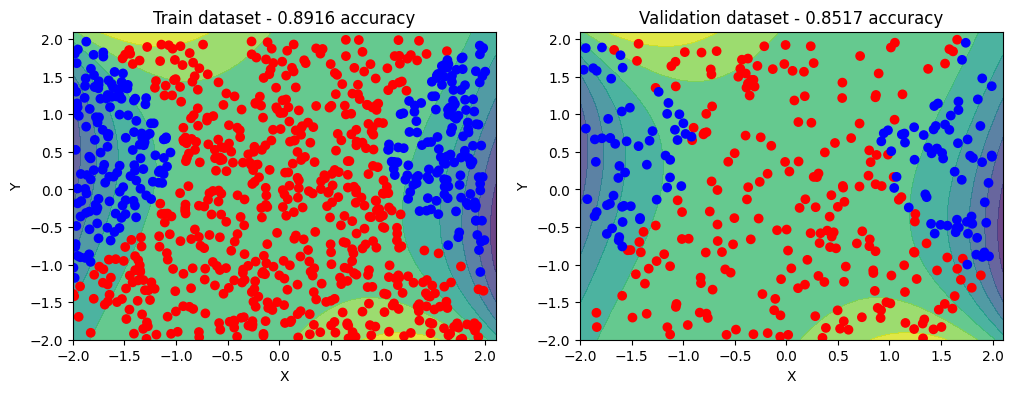

In [52]:
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=4 , C=3,)
clf = model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]

P = model.decision_function(xy).reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, P, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {clf.score(X_train, y_train):.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, P, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {clf.score(X_val, y_val):.4f} accuracy')

plt.show()

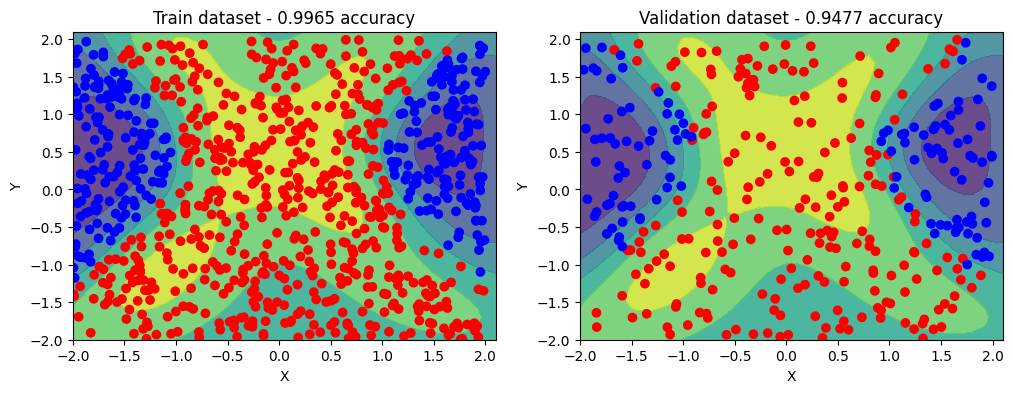

In [53]:
from sklearn.svm import SVC

model =SVC(kernel='rbf', gamma=1.5 , C=3)
clf = model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]

P = model.decision_function(xy).reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, P, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {clf.score(X_train, y_train):.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, P, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {clf.score(X_val, y_val):.4f} accuracy')

plt.show()

Use the validation dataset to tune better hyperparameter for rbf (gamma). Use C=3 as before.

best gamma : 2.1


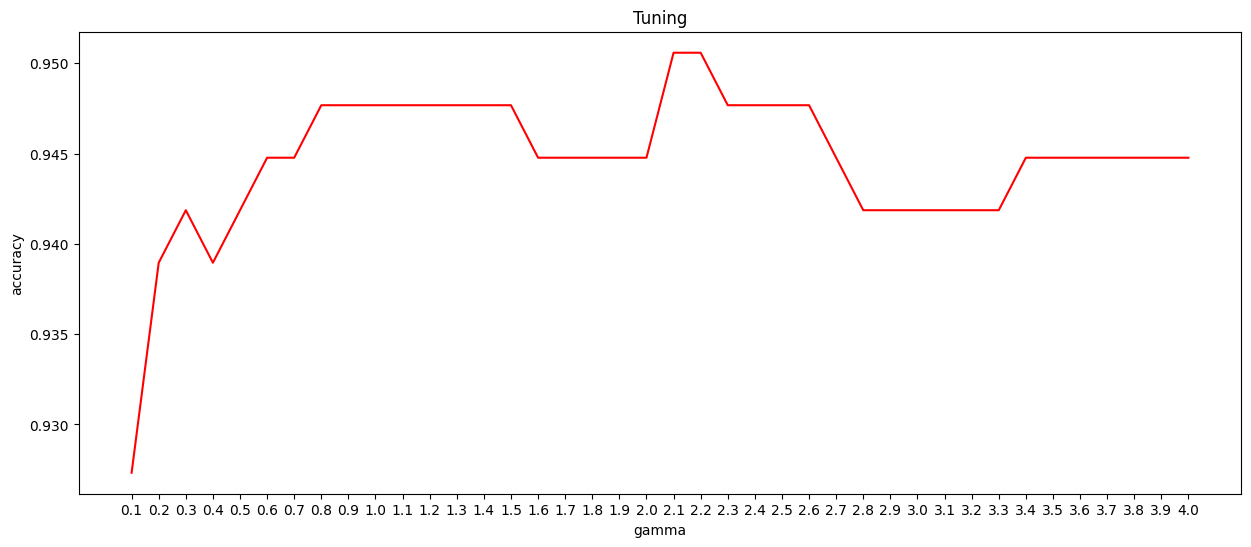

In [54]:
gammas = np.arange(0.1, 4.1, 0.1)
accs = []

best_gamma= 0.1
best_accuracy = 0
for gamma in gammas:
  model =SVC(kernel='rbf', gamma=gamma , C=3)
  model.fit(X_train, y_train)
  val_preds = model.predict(X_val)
  val_acc = np.mean(val_preds == y_val)
  accs.append(val_acc)
  if val_acc > best_accuracy:
    best_gamma=gamma
    best_accuracy=val_acc

print(f"best gamma : {best_gamma}")
plt.figure(figsize=(15,6))
plt.plot(gammas, accs, color='red')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('Tuning')
plt.xticks(gammas)
plt.show()

Questions:
- Without coding, only from the plot, will the accuracy change using the best $\gamma$ you found? Why?
- Why did we use C=3? <br/>
- Did you answer to best ml generalizer changed?


*   <font color='red'>Using the best $\gamma$ will get us a slightly better results as we can see in the histogram approximately to 95%</font>
*   <font color='red'>To get balance between achieving a low traning error and a low testing error.</font>
* <font color='red'>No, we can see that now using rbf kernel along with gamma=2.1 will get us a little more better results than the parabola one but when we compare it to the parabola there is no big difference between the accuracy and still the parabola faster</font>

## Question 4 - 10 pts Bonus
See attached PDF in Moodle